### Decision Tree Titanic_Survive

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [16]:
## import DataFrame
titanic_data=pd.read_csv("D:\\IBM_Data_Science\\Data_set\\titanic.csv")

In [17]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Get new columns that match

In [18]:
titanic_data=titanic_data[["Survived","Pclass","Sex","Age","Fare"]]
titanic_data.head(5)

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [19]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


### 1 Label Encoding Categorical Data

In [20]:
lb_l=LabelEncoder()
titanic_data_ldl=titanic_data.copy()
titanic_data_ldl['Sex']=lb_l.fit_transform(titanic_data_ldl['Sex'])
titanic_data_ldl.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


### 2. Filling Empty Columns for Data Consistency

In [21]:
titanic_data_ldl.Age.fillna(titanic_data.Age.mean(),inplace=True)
titanic_data_ldl.Age=titanic_data_ldl.Age.apply(lambda x:round(x))
titanic_data_ldl.drop(index=803,inplace=True)

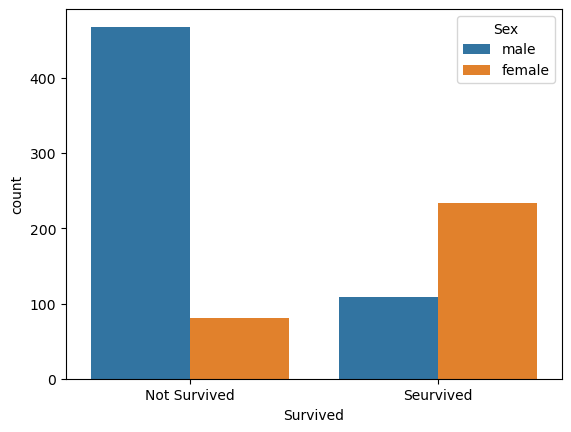

In [22]:
# Gender Vs Survived
sns.countplot(x='Survived',data=titanic_data,hue='Sex')

plt.xticks([0,1],['Not Survived','Seurvived'])
plt.show()

### 4.Pclass va Survived

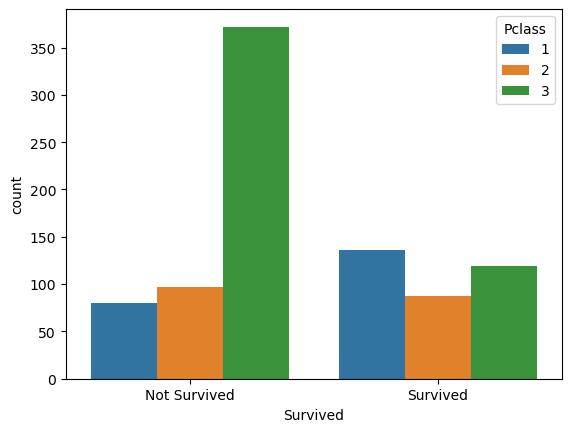

In [24]:
sns.countplot(x='Survived',data=titanic_data,hue = 'Pclass')
plt.xticks([0,1],["Not Survived","Survived"])
plt.show()

## 5 Correlation Matrix Between Features

Text(0.5, 1.0, 'Correlation matrix')

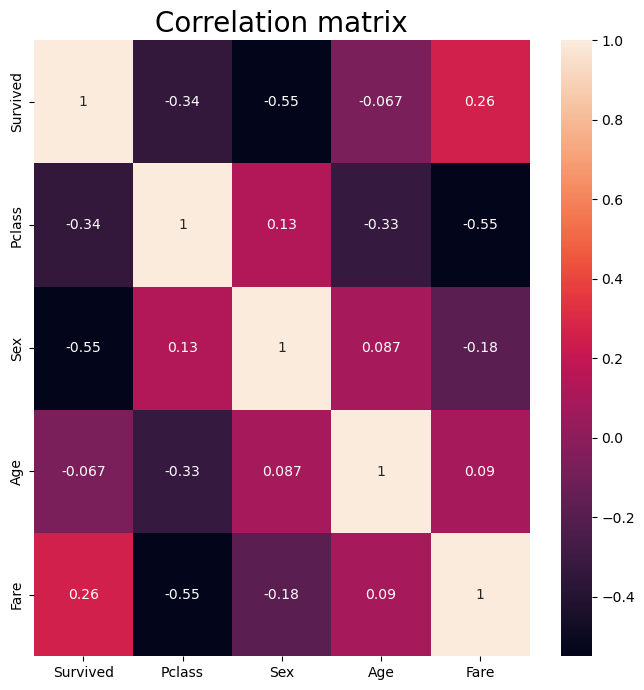

In [27]:
plt.figure(figsize=(8,8))
sns.heatmap(titanic_data_ldl.corr(),annot=True)
plt.title("Correlation matrix",fontdict={'size':20})

In [29]:
### 6. Target Variable
Y=titanic_data_ldl.Survived
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## 7. Features

In [30]:
X=titanic_data_ldl.drop(columns=['Survived'])
X.head()

,Pclass,Sex,Age,Fare
0,3,1,22,7.2500
1,1,0,38,71.2833
2,3,0,26,7.9250
3,1,0,35,53.1000
4,3,1,35,8.0500


## 8. Standardizing Data

In [35]:
mn=MinMaxScaler()
X[['Age',"Fare"]]=mn.fit_transform(X[['Age',"Fare"]])
X.head()

,Pclass,Sex,Age,Fare
0,3,1,0.265823,0.014151
1,1,0,0.468354,0.139136
2,3,0,0.316456,0.015469
3,1,0,0.430380,0.103644
4,3,1,0.430380,0.015713


In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [37]:
X_train.shape

(712, 4)

In [38]:
y_train.shape

(712,)

### 9 DecisionTreeClassifier

In [39]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [40]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'Fare'], dtype='object')

### 10 Visualizing Decision Tree Using Graphiz

In [41]:
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pylab as pylab
# Generating the tree
dot_data=export_graphviz(model,out_file=None,
                        feature_names=X.columns,
                        class_names=['Not Survived','Survived'])
graph = graphviz.Source(dot_data)
filename = graph.render(filename='img/DesecionTree')
pylab.savefig("filename.png")

<Figure size 640x480 with 0 Axes>

In [42]:
predict=model.predict(X_test)
predict

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0], dtype=int64)

## Evaluation model

In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [45]:
print("Acurracy score:",accuracy_score(y_test,predict))


Acurracy score: 0.7359550561797753


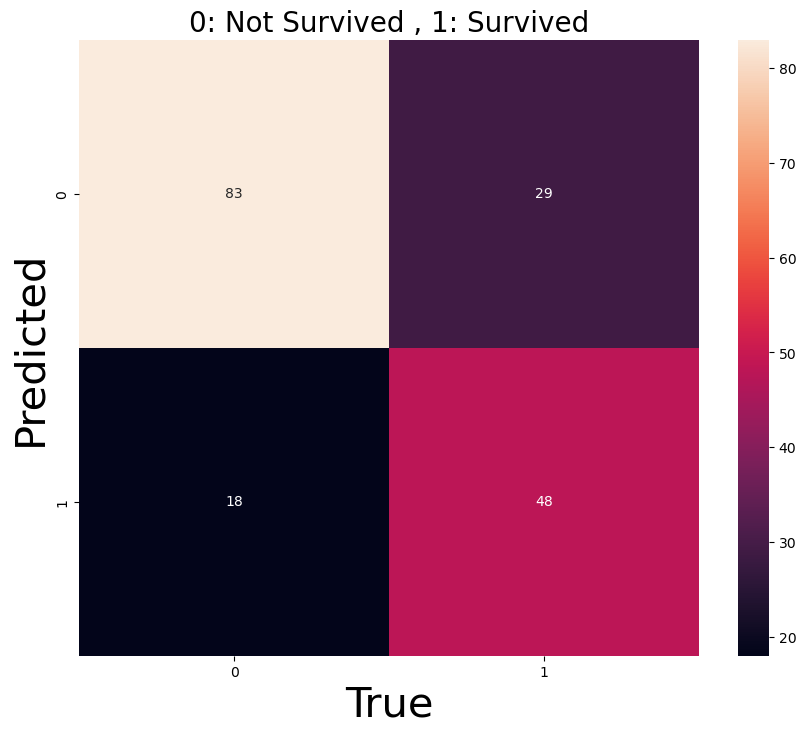

In [46]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,predict),annot=True)
plt.xlabel("True",fontdict={"size":"30"})
plt.ylabel("Predicted",fontdict={"size":"30"})
plt.title("0: Not Survived , 1: Survived",fontdict={"size":20})
plt.show()